# <u>TP 1 <u>

## Parte I: Familiarizandonos con la base EPH y limpieza

### 1) 
###### (Explicado en el informe)

### 2)

- Cargamos los microdatos de la EPH del primer trimestre de 2005 (.dta) y 2025 (.xls).

In [163]:
import pandas as pd
datos_05 = pd.read_stata("usu_individual_T105.dta")
datos_25 = pd.read_excel("usu_individual_T125.xls")

#### A)

- Primero pusimos en minuscula los nombres de las variables de cada base de datos para que las columnas tengan el mismo nombre y evitar confusiones al momento de integrarlas
- En la base de 2005, los valores de la variable region estaban en texto, mientras que en la base 2025 estaban codificados numericamente
- Para resolver esto, construimos un diccionario de mapeo (region_dic) que asocia cada texto con su valor numerico 
- Aplicamos este diccionario con .replace() para que ambas bases usen la misma codificación.
- Filtramos las observaciones de la región NOA (region == 40) porque nuestro análisis se centra en esa region

In [164]:
datos_05.columns = datos_05.columns.str.lower()
datos_25.columns = datos_25.columns.str.lower()

# Cambiamos los valores de region en la base de datos 2005 a numero
region_dic = {
    "Gran Buenos Aires": 1,
    "NOA": 40,
    "NEA": 41,
    "Cuyo": 42,
    "Pampeana": 43,
    "Patagónica": 44
}

# Reemplazamos los valores de texto por números en la misma columna
datos_05["region"] = datos_05["region"].replace(region_dic)

print(datos_05["region"].unique()) # Chequeamos que se hayan cambiado los valores

[1, 40, 41, 42, 43, 44]
Categories (6, int64): [1 < 40 < 41 < 42 < 43 < 44]


/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/3815572605.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_05["region"] = datos_05["region"].replace(region_dic)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/3815572605.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  datos_05["region"] = datos_05["region"].replace(region_dic)


- Filtramos por región las bases de datos con variables en formato numerico

In [165]:
datos_05 = datos_05[datos_05["region"] == 40]
datos_25 = datos_25[datos_25["region"] == 40]

print(datos_05["region"].unique()) # chequeo que solo queden los valores 40 (NOA)
print(datos_25["region"].unique())

[40]
Categories (6, int64): [1 < 40 < 41 < 42 < 43 < 44]
[40]


- Unimos ambas bases de datos (2005 y 2025) con la función concat para trabajar con un solo dataframe

In [166]:
datos = pd.concat([datos_05, datos_25]) # unimos las bases de datos
print(datos.shape) # chequeamos se hayan juntado

(19090, 243)


In [167]:
datos.reset_index(drop=True) # index original lo descartamos

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,v21_03_m,v22_01_m,v22_02_m,v22_03_m,p_deccf,p_rdeccf,p_gdeccf,p_pdeccf,p_ideccf,p_adeccf
0,125666,1.0,1.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125666,1.0,2.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125666,1.0,3.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125666,1.0,4.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125666,1.0,5.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,1,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19086,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19087,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,3,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19088,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,1,1,2025.0,1,40,N,22,108.0,...,0.0,0.0,0.0,0.0,7.0,8.0,NaN,7.0,8.0,8.0


### B)

In [168]:
# b) Seleccionamos las 15 variables
datos1 = datos[["region", "ano4", "ch03", "ch04","ch06", "ch07", "ch08", "ch09", "ch10", "ch14", "ch15", "ch16", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup"]]

- Creamos distintos diccionarios de recodificacion basadonos en el manual de la EPH, para traducir respuestas en texto a valores numericos
- Definimos la función reemplazar_valores(columna, diccionario) que hace lo siguiente:
    - Agarra una columna y un diccionario
    - Despues le aplica .replace(diccionario) para mapear los valores
    - Y convierte el resultado a tipo float para que sea compatible para lo que hagamos mas adelante

In [169]:
def reemplazar_valores(columna, diccionario): # Función para reemplezar variables
    """
    Parámetros:
    - columna: nombre de la columna a modificar
    - diccionario: dict, mapeo {valor_original: valor_nuevo}
    """
    datos1[columna] = datos1[columna].replace(diccionario)
    datos1[columna] = datos1[columna].astype(float) # nos aseguramos que todos los datos sean numericos

- Mediante la funcion unique, observamos que en la variable ch14 de la base 2005 entre sus valores figuraba uno que corresponde a un espacio en blanco, por lo que mas adelante convertimos dentro de la funcion "remplazar_valores" en NaN para que no distorcionara los reusltados y simplicar el analisis posterior
- Remplazamos la respuesta "menos de 1 año" de la variables ch06 a valor 0

In [170]:
# Llamamos las funciones para reemplazar valores, para cada diccionario nos fuimos fijando como estaba codificado originalmente
sexo_dic = {
    "Varón":1,
    "Mujer":2
}
estado_civil_dic = {
    "Unido":1,
    "Casado":2,
    "Separado o divorciado":3,
    "Viudo":4,
    "Soltero":5,
}
cobertura_dic = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia y planes y seguros públicos": 23,
    "Obra social y mutual/prepaga/servicio de emergencia y planes y seguros públicos": 123
}
edu_dic = {
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción": 7,
    "Ns/Nr": 9
}
estado_dic = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
cat_dic = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
}
ch03_dic = {
    "Jefe": 1,
    "Cónyuge/Pareja": 2,
    "Hijo/Hijastro": 3,
    "Yerno/Nuera": 4,
    "Nieto": 5,
    "Madre/Padre": 6,
    "Suegro": 7,
    "Hermano": 8,
    "Otros familiares": 9,
    "No familiares": 10
}
leer_dic = {
    "Sí": 1,
    "No": 2,
    "Menor de 2 años": 3
}
cat_ocup_dic = {
    "Patrón": 1,
    "Cuenta propia": 2,
    "Obrero o empleado": 3,
    "Trabajador familiar sin remuneración": 4,
    "Ns/Nr": 9
}
ch10_dic= {
    "Sí, asiste": 1,
    "No asiste, pero asistió": 2,
    "Nunca asistió": 3
}
ch15_dic = {
    "En esta localidad": 1,
    "En otra localidad": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "Ns/Nr": 9
}
ch16_dic = {
    "En esta localidad": 1,
    "En otra localidad de esta provincia": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "No había nacido": 6,
    "Ns./Nr.": 9
}
ch14_dic = {
    '00': 0,
    '01': 1,
    '02': 2,
    '03': 3,
    '04': 4,
    '05': 5,
    '06': 6,
    '07': 7,
    '08': 8,
    '09': 9,
    '98': 98,
    '99': 99,
    '  ': None,   # a los espacios en blanco lo convierte en NaN
}
ch06_dic = {
    "Menos de 1 año":0
}

reemplazar_valores("ch04", sexo_dic)
reemplazar_valores("ch07", estado_civil_dic)
reemplazar_valores("ch08", cobertura_dic)
reemplazar_valores("nivel_ed", edu_dic)
reemplazar_valores("estado", estado_dic) 
reemplazar_valores("cat_inac", cat_dic)
reemplazar_valores("ch03", ch03_dic)
reemplazar_valores("ch09", leer_dic) 
reemplazar_valores("cat_ocup", cat_ocup_dic) 
reemplazar_valores("ch10", ch10_dic) 
reemplazar_valores("ch15", ch15_dic)
reemplazar_valores("ch16", ch16_dic) 
reemplazar_valores("ch14", ch14_dic) 
reemplazar_valores("ch06", ch06_dic)

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/1687688341.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos1[columna] = datos1[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/1687688341.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1[columna] = datos1[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/1687688341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

- Agrupamos por año (ano4) y dentro de cada grupo contamos los NaN de cada columna con isna().sum()
- Convertimos el indice de años a entero para que en el gráfico se vean 2005 y 2025 y que no sea float
- Graficamos con sns.heatmap --> cada celda muestra el número de faltantes y cuanto más rojo más NaN hay

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/1993687020.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_anio = datos1.groupby(col_anio).apply(lambda x: x.isna().sum())


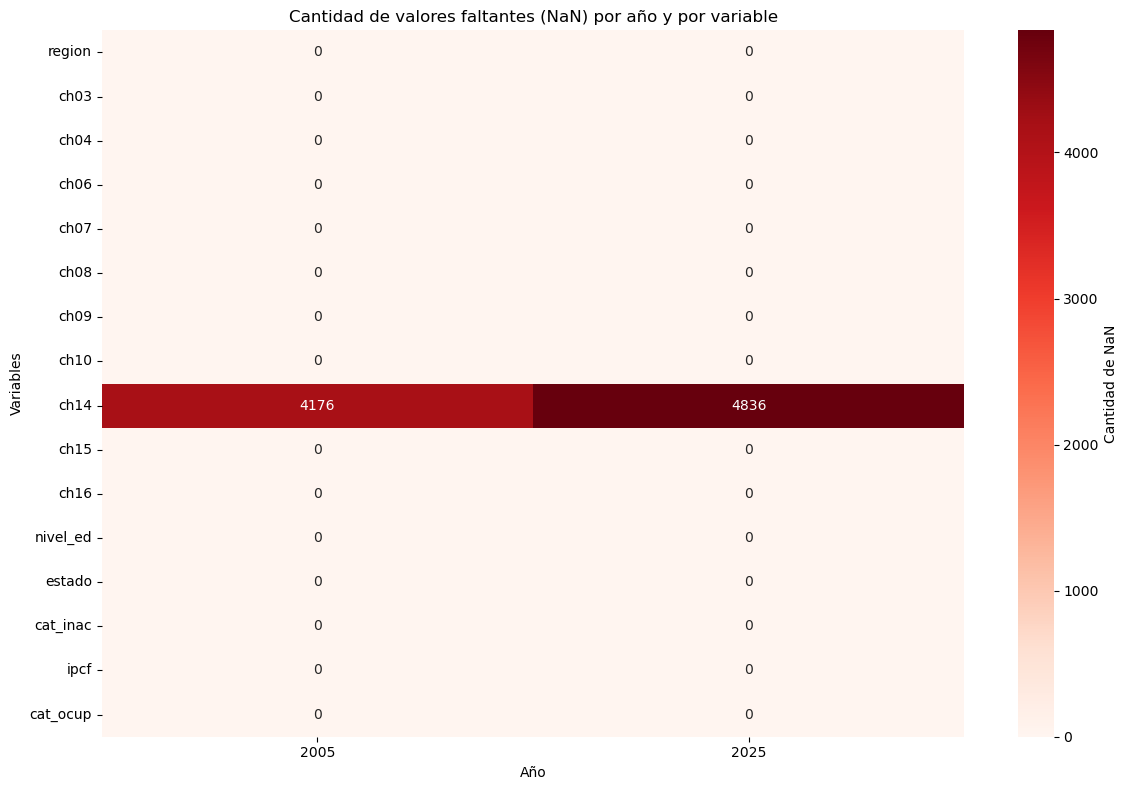

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_anio = "ano4"

# Calculamos cantidad de NaN por año y variable
faltantes_por_anio = datos1.groupby(col_anio).apply(lambda x: x.isna().sum())

# Convertimos a int para que no aparezca con decimales
faltantes_por_anio.index = faltantes_por_anio.index.astype(int)

# Eliminamos columnas identificatorias del heatmap
cols_quitar = [col_anio, "id_persona"]  # ajustá según tu base
faltantes_por_anio = faltantes_por_anio.drop(
    columns=[c for c in cols_quitar if c in faltantes_por_anio.columns],
    errors="ignore"
)

# Graficamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(faltantes_por_anio.T, annot=True, fmt="d", cmap="Reds",
            cbar_kws={'label': 'Cantidad de NaN'})
plt.title("Cantidad de valores faltantes (NaN) por año y por variable")
plt.xlabel("Año")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

- En el heatmap, encontramos que solo la variable ch14 presento valores faltantes NaN, en el que 4836 de datos corresponden a la base de datos de 2025 y 4176 a la de 2005. El resto de las variables no presenta valores ausentes en ninguno de los dos años.
- Dado que estos resultados nos resultaban sospechosos, realizamos estadísticas descriptivas con el fin de asegurarnos que los resultados obtenidos fueran correctos. Además, calculamos los valores faltantes antes de unificar las bases de datos para comprobar que no sea un problema de la unificación de bases a lo que obtuvimos los mismos resultados que antes.

In [172]:
# Comprobamos que los analisis sean correctos
faltantes_05 = datos_05[["region", "ano4", "ch03", "ch04","ch06", "ch07", "ch08", "ch09", "ch10", "ch14", "ch15", "ch16", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup"]]
faltantes_25 = datos_25[["region", "ano4", "ch03", "ch04","ch06", "ch07", "ch08", "ch09", "ch10", "ch14", "ch15", "ch16", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup"]]

var_faltantes_05 = faltantes_05.isna().sum().sum()
var_faltantes_25 = faltantes_25.isna().sum().sum()
print(var_faltantes_05) # Salta 0 valores faltantes en vez de 4176 como en el heatmap por los espacios en blancos que pasamos a NaN
print(var_faltantes_25)

# Hacemos estdisticas descriptivas para cheaquear lo de la base de datos
datos_25.describe().round()

0
4836


,ano4,trimestre,nro_hogar,componente,h15,region,aglomerado,pondera,ch03,ch04,...,v21_03_m,v22_01_m,v22_02_m,v22_03_m,p_deccf,p_rdeccf,p_gdeccf,p_pdeccf,p_ideccf,p_adeccf
count,9742.0,9742.0,9742.0,9742.0,9742.0,9742.0,9742.0,9742.0,9742.0,9742.0,...,9742.0,9742.0,9742.0,9742.0,8707.0,8707.0,3581.0,5126.0,8707.0,8707.0
mean,2025.0,1.0,1.0,3.0,1.0,40.0,23.0,293.0,3.0,2.0,...,1263.0,1408.0,2469.0,1768.0,5.0,6.0,5.0,5.0,5.0,6.0
std,0.0,0.0,0.0,2.0,0.0,0.0,4.0,180.0,2.0,0.0,...,11647.0,11345.0,12908.0,10983.0,3.0,3.0,3.0,3.0,3.0,3.0
min,2025.0,1.0,1.0,1.0,0.0,40.0,18.0,47.0,1.0,1.0,...,0.0,-9.0,-9.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,2025.0,1.0,1.0,1.0,1.0,40.0,19.0,179.0,1.0,1.0,...,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0
50%,2025.0,1.0,1.0,2.0,1.0,40.0,23.0,254.0,3.0,2.0,...,0.0,0.0,0.0,0.0,5.0,6.0,5.0,5.0,5.0,6.0
75%,2025.0,1.0,1.0,4.0,1.0,40.0,25.0,367.0,3.0,2.0,...,0.0,0.0,0.0,0.0,7.0,8.0,7.0,7.0,7.0,8.0
max,2025.0,1.0,4.0,13.0,2.0,40.0,29.0,1837.0,10.0,2.0,...,240000.0,600000.0,70000.0,70000.0,10.0,10.0,10.0,10.0,10.0,10.0


In [173]:
datos_05.describe().round() # Solo muestra una columna porque los datos son tipo texto

,nro_hogar,ano4,pondera,pp03d,pp3e_tot,pp3f_tot,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,...,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,ipcf
count,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,...,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0,9348.0
mean,1.0,2005.0,238.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,6.0,1.0,0.0,8.0,75.0,1181.0,275.0
std,0.0,0.0,92.0,0.0,22.0,3.0,0.0,0.0,1.0,1.0,...,36.0,1.0,21.0,49.0,40.0,0.0,60.0,274.0,1103.0,302.0
min,1.0,2005.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,2005.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,100.0
50%,1.0,2005.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,870.0,180.0
75%,1.0,2005.0,291.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1475.0,330.0
max,6.0,2005.0,717.0,6.0,126.0,56.0,4.0,10.0,41.0,20.0,...,3000.0,125.0,1300.0,1500.0,3500.0,20.0,1500.0,4500.0,10580.0,3900.0


### C)

- Primero chequeamos con la funcion unique para identificar los valores sin sentido, o sea, las variables que tienen valores que no corresponden al diccionario
- Etiquetamos los registros problemáticos sin borrarlos todavía y elegimos -1 porque no choca con categorias reales y es facil de detectar
- Sumamos cuantos -1 hay en cada una para reportar el alcance del problema

In [174]:
datos1.loc[datos1["ipcf"] < 0, "ipcf"] = -1
datos1.loc[datos1["ch06"] < 0, "ch06"] = -1
datos1.loc[datos1["ch10"] == 0, "ch10"] = -1

for col in ["ipcf", "ch06", "ch10"]:
    print(f"{col}: {(datos1[col] == -1).sum()} valores extraños")

ipcf: 0 valores extraños
ch06: 51 valores extraños
ch10: 466 valores extraños


In [175]:
datos_filtrado = datos1[~((datos1["ipcf"] == -1) | (datos1["ch06"] == -1) | (datos1["ch10"] == -1))]

print("Filas originales:", len(datos))
print("Filas después de eliminar:", len(datos_filtrado))

Filas originales: 19090
Filas después de eliminar: 18624


- Despues del análisis, concluimos que solo 3 variables tienen valores extraños: ch10, edad e ipcf. Durante la revisión de la base de datos se identificó que algunos participantes respondieron con el valor “0” en la variable “ch10”. Este valor fue considerado inválido, dado que no corresponde a ninguna de las categorías especificadas en el diccionario de la encuesta. Además, en los comentarios generales del cuestionario se aclara que el “0” se utiliza únicamente para indicar casos en los que no corresponde responder la secuencia de preguntas asociadas. Sin embargo, en este caso en particular la pregunta “ch10” debía ser respondida por la totalidad de los participantes, por lo cual los registros con “0” los clasificamos como extraños. También consideramos a los valores de las variables “edad” y “ipcf” que eran negativos como extraños.
- Los valores considerados extraños fueron recodificados con el valor -1, con el objetivo de identificarlos fácilmente para después contarlos. Elegimos el valor -1 dado que dicho valor no corresponde a ninguna categoría válida en las variables de la base de datos. Por lo tanto, para la variable “ipcf” encontramos 0 valores extraños, para la variable “ch06” hay 51 valores extraños y para la variable ch10 hay 466 variables extraños. Posteriormente, estos registros fueron eliminados para garantizar la consistencia y validez de los análisis. Luego de la eliminación de los valores extraños mediante el uso del comando .loc, la base de datos quedó conformada por un total de 18.624 observaciones.

## Parte II: Primer Análisis Exploratorio

### 3) 

- Vemos la distirbucion de la población por sexo en los años 2005 y 2025 en el NOA haciendo un barplot

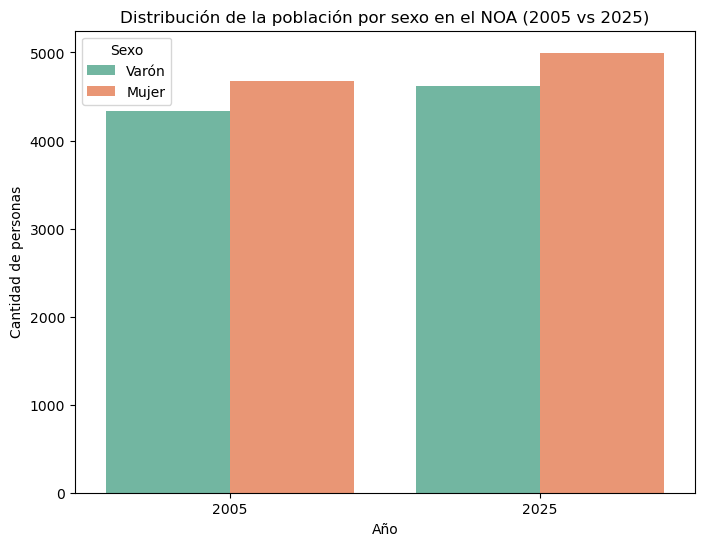

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupamos por año y sexo
comp_sexo = datos_filtrado.groupby(["ano4", "ch04"]).size().reset_index(name="conteo")

# Mapeamos valores de sexo a etiquetas legibles
map_sexo = {1: "Varón", 2: "Mujer"}
comp_sexo["ch04"] = comp_sexo["ch04"].replace(map_sexo)

# Filtramos solo 2005 y 2025
comp_sexo = comp_sexo[comp_sexo["ano4"].isin([2005, 2025])]
comp_sexo["ano4"] = comp_sexo["ano4"].astype(int)   # hacemos los años enteros

# Grafico de barras
plt.figure(figsize=(8,6))
sns.barplot(data=comp_sexo, x="ano4", y="conteo", hue="ch04", palette="Set2")

plt.title("Distribución de la población por sexo en el NOA (2005 vs 2025)")
plt.ylabel("Cantidad de personas")
plt.xlabel("Año")
plt.legend(title="Sexo", loc="upper left")  #leyenda a la izquierda
plt.show()

### 4)

- creamos la matriz de correlación de ambos años que muestra la relación entre las principales variables sociodemográficas seleccionadas: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF
- creamos la variable dicotómicas binarias para la columna “ch04”, es decir la sexo, ya que es la única dicotimica dentro de la selcción de variables. En esta recodificación se mantuvo el valor “1” para identificar a los varones, mientras que el valor “2” fue transformado en “0” para representar a las mujeres.

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/483072455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrado["ch04"] = datos_filtrado["ch04"].replace({2: 0}) # el 1 se deja igual pq es hombre y cambio el 2 (mujer) por 0


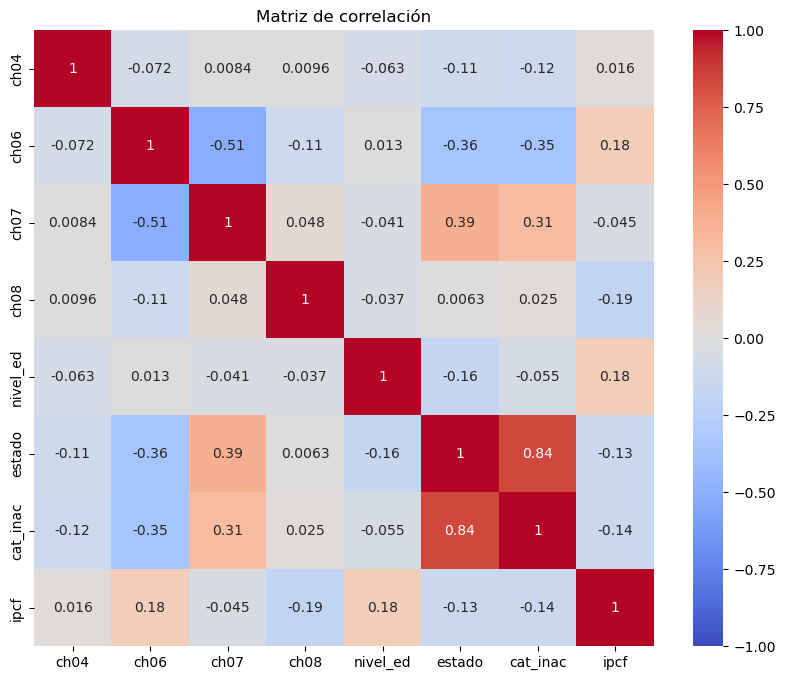

In [177]:
# Creamos las variables dicotómicas binarias necesarias (variables dummies) y renombramos dichas variables
datos_filtrado["ch04"] = datos_filtrado["ch04"].replace({2: 0}) # el 1 se deja igual pq es hombre y cambio el 2 (mujer) por 0

# Matriz de correlación
vars_interes = ["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "ipcf"]
corr = datos_filtrado[vars_interes].corr()

# Gráfico
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

### Parte III: Conociendo a los pobres y no pobres

### 5)

In [178]:
datos3_05 = datos_05[["region", "codusu","ano4", "ch04","ch06", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup", "itf"]]
datos3_25 = datos_25[["region", "codusu","ano4", "ch04","ch06", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup", "itf"]]

- Selección de variables: de cada base (2005 y 2025) tomamos solo algunas columnas como año, región, sexo, edad e ingreso total familiar (itf)
- No respuesta en condición de actividad: contamos los casos sin respuesta (en 2005 como texto y en 2025 como 0)
- Verificamos si había valores menores a 0 en itf
- Armamos una base única (itf_base) con datos de ambos años y homogenizamos variables (sexo recodificado, edad numerica)
- por lo que se guardan asi los datos
    - respondieron: personas con itf distinto de 0
    - norespondieron: personas con itf = 0 o faltante
- Comparamos los totales para confirmar que respondieron + norespondieron = total de la base.

In [179]:
no_respuesta05 = (datos3_05 ["estado"] == "Entrevista individual no realizada (no respuesta al cuestion").sum()
print("Personas que no respondieron su condición de actividad en 2005:", no_respuesta05)

no_respuesta25 = (datos3_25 ["estado"] == 0).sum()
print("Personas que no respondieron su condición de actividad en 2025:", no_respuesta25)

Personas que no respondieron su condición de actividad en 2005: 8
Personas que no respondieron su condición de actividad en 2025: 16


In [180]:
# Chequeamos de valores negativos en la variable itf

negativos05 = (datos3_05["itf"] < 0).sum()
print("Cantidad de valores negativos en ipcf en 2005:", negativos05)

negativos25 = (datos3_25["itf"] < 0).sum()
print("Cantidad de valores negativos en ipcf en 2025:", negativos25)

Cantidad de valores negativos en ipcf en 2005: 0
Cantidad de valores negativos en ipcf en 2025: 0


In [181]:
itf_base = pd.concat([datos3_05[["ano4", "codusu", "itf", "ch04", "ch06"]], 
                      datos3_25[["ano4", "codusu", "itf", "ch04", "ch06"]]],
                     ignore_index=True)

print(itf_base["ch04"].unique()) # tengo que volver a renombrar varon y mujer en la base de datos
itf_base["ch04"] = itf_base["ch04"].replace(sexo_dic)
itf_base["ch04"] = itf_base["ch04"].replace(sexo_dic)
itf_base["ch06"] = itf_base["ch06"].replace(ch06_dic)
itf_base["ch06"] = itf_base["ch06"].astype(float)

['Varón' 'Mujer' 2 1]


/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/2551668848.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  itf_base["ch04"] = itf_base["ch04"].replace(sexo_dic)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_82332/2551668848.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  itf_base["ch06"] = itf_base["ch06"].replace(ch06_dic)


In [182]:
respondieron = itf_base[itf_base["itf"] != 0].copy()
norespondieron = itf_base[(itf_base["itf"] == 0) | (itf_base["itf"].isna())].copy()

# Chequeo rápido
print("Total de casos:", len(itf_base))
print("Respondieron:", len(respondieron))
print("No respondieron:", len(norespondieron))

Total de casos: 19090
Respondieron: 17973
No respondieron: 1117


### 6) 

- Primero cargamos el archivo tabla_adulto_equiv.xlsx, para conocer los valores de adulto equivalente correspondientes a cada persona segun su edad y sexo
    - Como ese archivo tenia texto en las primeras filas, leimos a partir de la cuarta fila (header=3)
    - Seleccionamos solo las columnas que nos sirven (edad, mujeres y varones)
    - Reemplazamos las comas por puntos en los decimales (decimal=",")
    - Renombramos las columnas a un formato más simple y eliminamos las filas sin datos en la variable

- Luego, reorganizamos la tabla de equivalencias
    - La tabla tenia una columna para mujeres y otra para varones, lo que hicimos fue usar melt:
    - Pasamos de dos columnas (mujeres y varones) a una sola columna de valores (adulto_equiv)
    - el melt hizo una columna sexo_txt que indicaba de dónde venia cada valor (“mujeres” o “varones”)
    - Convertimos sexo_txt a la codificación de la EPH (ch04: 1 = varon, 2 = mujer)
    - Renombramos la columna edad como grupo_edad y dejamos solo las columnas necesarias (grupo_edad, ch04, adulto_equiv)

In [183]:
# Leer la tabla de equivalencias (fila 4 = encabezados)
tabla = pd.read_excel(
    "tabla_adulto_equiv.xlsx",
    header=3,        # fila 4 (0-indexed)
    usecols="A:C",   # Edad, Mujeres, Varones
    decimal=","      # convierte "0,35" -> 0.35
)

# Renombrar columnas y limpiar
tabla = tabla.rename(columns={"Edad":"edad", "Mujeres":"mujeres", "Varones":"varones"})
tabla = tabla.dropna(subset=["edad"]).reset_index(drop=True)

# Pasar a formato largo (sexo en filas)
tabla_long = tabla.melt(id_vars="edad", var_name="sexo_txt", value_name="adulto_equiv")
map_sexo = {"varones": 1, "mujeres": 2}
tabla_long["ch04"] = tabla_long["sexo_txt"].str.lower().map(map_sexo)
tabla_long = tabla_long.rename(columns={"edad":"grupo_edad"})[["grupo_edad","ch04","adulto_equiv"]]

- La base de datos de la EPH registra la edad como número (ch06), pero la tabla de equivalencias estaba agrupada en categorías de edad
- Entonces, definimos la función edad_a_grupo, que toma la edad numérica y devuelve la categoría textual correspondiente

In [184]:
def edad_a_grupo(e):
    if pd.isna(e): return np.nan
    e = int(e)
    if e < 1:   return "Menor de 1 año"
    if e == 1:  return "1 año"
    if e == 2:  return "2 años"
    if e == 3:  return "3 años"
    if e == 4:  return "4 años"
    if e == 5:  return "5 años"
    if e == 6:  return "6 años"
    if e == 7:  return "7 años"
    if e == 8:  return "8 años"
    if e == 9:  return "9 años"
    if e == 10: return "10 años"
    if e == 11: return "11 años"
    if e == 12: return "12 años"
    if e == 13: return "13 años"
    if e == 14: return "14 años"
    if e == 15: return "15 años"
    if e == 16: return "16 años"
    if e == 17: return "17 años"
    if 18 <= e <= 29: return "18 a 29 años"
    if 30 <= e <= 45: return "30 a 45 años"
    if 46 <= e <= 60: return "46 a 60 años"
    if 61 <= e <= 75: return "61 a 75 años"
    return "más de 75 años"

respondieron["grupo_edad"] = respondieron["ch06"].apply(edad_a_grupo)

- Antes de unir, borramos cualquier columna previa que empiece con adulto_equiv (por si ya existia una de haber intentado antes)
- Asi evitamos duplicados o confundirnos con los nombres
- Hicimos un merge, uniendo la base respondieron con la tabla de equivalencias usando como criterio de unión la combinación de grupo_edad (categoria de edad) y ch04 (sexo)
- Con how="left" nos aseguramos de mantener a todos los individuos de la EPH aunque no tengan coincidencia en la tabla
- Renombramos la columna resultante como adulto_equiv

In [185]:
respondieron = respondieron.drop(columns=[c for c in respondieron.columns if c.startswith("adulto_equiv")], errors="ignore")

# merge controlado
respondieron = respondieron.merge(
    tabla_long[["grupo_edad","ch04","adulto_equiv"]].rename(columns={"adulto_equiv":"adulto_equiv_tbl"}),
    on=["grupo_edad","ch04"],
    how="left"
)

# dejar el nombre final y eliminar el alias
respondieron["adulto_equiv"] = respondieron.pop("adulto_equiv_tbl")

- Agrupamos la base por codusu, que es la variable que identifica a cada hogar
- Para cada hogar, sumamos los valores de adulto_equiv de todos sus integrantes
- Con .transform("sum") esa suma se replica en cada fila del hogar y asi crea la nueva "columna ad_equiv_hogar"
- Cada persona tiene tanto su propio valor de adulto equivalente como el total de su hogar

In [186]:
respondieron["ad_equiv_hogar"] = respondieron.groupby("codusu")["adulto_equiv"].transform("sum")

In [187]:
respondieron["ad_equiv_hogar"] = (
    respondieron.groupby("codusu")["adulto_equiv"].transform("sum")
)

# Chequeo rápido
print(respondieron.head(8))

     ano4    codusu     itf  ch04  ch06    grupo_edad  adulto_equiv  \
0  2005.0  125666     700.0     1  36.0  30 a 45 años          1.00   
1  2005.0  125666     700.0     2  35.0  30 a 45 años          0.77   
2  2005.0  125666     700.0     2  15.0       15 años          0.77   
3  2005.0  125666     700.0     1  12.0       12 años          0.85   
4  2005.0  125666     700.0     1  10.0       10 años          0.79   
5  2005.0  126344    3800.0     1  53.0  46 a 60 años          1.00   
6  2005.0  126344    3800.0     2  52.0  46 a 60 años          0.76   
7  2005.0  126344    3800.0     1  16.0       16 años          1.03   

   ad_equiv_hogar  
0            4.18  
1            4.18  
2            4.18  
3            4.18  
4            4.18  
5            2.79  
6            2.79  
7            2.79  


### 7)

- Definimos un diccionario "cbt_valores" con el valor de la canasta basica Total (CBT) para un adulto equivalente en cada año
- Luego creamos la columna ingreso_necesario, que representa el ingreso minimo que necesita cada hogar para no ser pobre
    - Para calcularla, tomamos el valor de la canasta correspondiente al año (ano4.map(cbt_valores))
    - Lo multiplicamos por el total de adultos equivalentes del hogar (ad_equiv_hogar)
- Con esto, cada fila (persona) tiene asociado el monto de ingreso necesario de su hogar en ese trimestre y año
- Hicimos un chequeo rápido mostrando "ano4", "ad_equiv_hogar" e "ingreso_necesario" para confirmar que lo que hicimos estaba bien

In [188]:
# Valores de la canasta básica total por adulto equivalente
cbt_valores = {2005: 205.07, 2025: 365_177.00}

# ingreso_necesario = CBT(año) * adultos equivalentes del hogar
respondieron["ingreso_necesario"] = (
    respondieron["ano4"].map(cbt_valores) * respondieron["ad_equiv_hogar"]
)

# Chequeo
print(respondieron[[ "ano4", "ad_equiv_hogar", "ingreso_necesario"]].head(-10))

         ano4  ad_equiv_hogar  ingreso_necesario
0      2005.0            4.18           857.1926
1      2005.0            4.18           857.1926
2      2005.0            4.18           857.1926
3      2005.0            4.18           857.1926
4      2005.0            4.18           857.1926
...       ...             ...                ...
17958  2025.0            1.78        650015.0600
17959  2025.0            0.76        277534.5200
17960  2025.0            1.99        726702.2300
17961  2025.0            1.99        726702.2300
17962  2025.0            1.99        726702.2300

[17963 rows x 3 columns]


### 8)

- Creamos la columna pobre:
    - Toma valor 1 si el ingreso total familiar (itf) es menor que el ingreso_necesario calculado antes (si no alcanza la canasta)
    - Toma valor 0 en caso contrario
- Usamos .astype(int) para convertir los valores True/False en 1 y 0
- Calculamos la cantidad de pobres por año sumando la columna pobre dentro de cada grupo de "ano4" (porque 1 = pobre)
- Calculamos el total de observaciones por año (cuantas personas/hogares había en la muestra en ese año)
- Calculamos el porcentaje de pobres dividiendo la cantidad de pobres sobre el total, multiplicando por 100 y redondeando a 2 decimales
- Organizamos todo en un dataframe para mostrar, por cada año:
    - el número de pobres
    - el total de observaciones
    - y el porcentaje que representan

In [189]:
# Crear la columna "pobre": 1 si ITF < ingreso_necesario, 0 si no
respondieron["pobre"] = (respondieron["itf"] < respondieron["ingreso_necesario"]).astype(int) # Convierte True → 1 y False → 0

# Calcular cantidad de pobres por año
conteo_pobres = respondieron.groupby("ano4")["pobre"].sum()

#  Calcular total de observaciones por año
conteo_total = respondieron.groupby("ano4")["pobre"].count()

# Calcular porcentaje
porcentaje_pobres = (conteo_pobres / conteo_total * 100).round(2)

# Resumen
resumen_pobreza = pd.DataFrame({
    "pobres": conteo_pobres,
    "total de observaciones": conteo_total,
    "porcentaje": porcentaje_pobres
})

print(resumen_pobreza)

        pobres  total de observaciones  porcentaje
ano4                                              
2005.0    4196                    9278       45.23
2025.0    3967                    8695       45.62


### 9)

- Usamos .describe() sobre pobre agrupado por "ano4" para obtener una tabla descriptiva con estadísticas adicionales como la media, el desvio estandar, minimo y maximo

In [190]:
# Tabla descriptiva de pobre por año
tabla_pobre = respondieron.groupby("ano4")["pobre"].describe().T
print(tabla_pobre)

ano4        2005.0       2025.0
count  9278.000000  8695.000000
mean      0.452253     0.456239
std       0.497742     0.498110
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000


- Agrupamos la base por año (ano4) y sexo (ch04) para analizar la variable "pobre" 
- Calculamos tres cosas para cada grupo:
    - pobres: cantidad de casos con pobre = 1 (suma)
    - total: cantidad total de observaciones en ese grupo (count)
    - porcentaje: proporción de pobres sobre el total de cada grupo
- Con reset_index() devolvimos las columnas ano4 y ch04
- Reemplazamos los codigos de sexo (1, 2) por varones o mujeres
- Renombramos las columnas para que aparezcan como año y sexo
- El resultado es una tabla con, para cada combinación año–sexo:
    - el número de pobres
    - el total de observaciones
    - y el porcentaje de pobres dentro del grupo

In [191]:
# Resumen de pobreza por sexo (ch04) y año
grp = respondieron.groupby(["ano4", "ch04"])["pobre"]
resumen_pobreza_sexo = grp.agg(pobres="sum", total="count")
resumen_pobreza_sexo["porcentaje"] = (resumen_pobreza_sexo["pobres"] / resumen_pobreza_sexo["total"] * 100).round(2)
resumen_pobreza_sexo = (resumen_pobreza_sexo
                        .reset_index()
                        .replace({"ch04": {1: "Varones", 2: "Mujeres"}})
                        .rename(columns={"ano4":"año","ch04":"sexo"}))
print(resumen_pobreza_sexo)

      año     sexo  pobres  total  porcentaje
0  2005.0  Varones    2068   4484       46.12
1  2005.0  Mujeres    2128   4794       44.39
2  2025.0  Varones    1889   4178       45.21
3  2025.0  Mujeres    2078   4517       46.00


- Primero, creamos una columna pobre_label que traduce la variable binaria pobre en etiquetas más claras (0 = “No pobre” y 1 = “Pobre”)
- Despues, usamos sns.catplot de la librería Seaborn para graficar:
- En el eje X colocamos los años (ano4), diferenciando entre 2005 y 2025
- En el hue (colores) usamos pobre_label, de manera que cada barra se divide en pobres y no pobres
- Con col="sexo" creamos dos paneles separados, uno para varones y otro para mujeres
- kind="count" indica que graficamos conteos absolutos de personas
- Ajustamos el titulo general de la figura para que quede claro que se trata de la distribución de pobreza por sexo y año

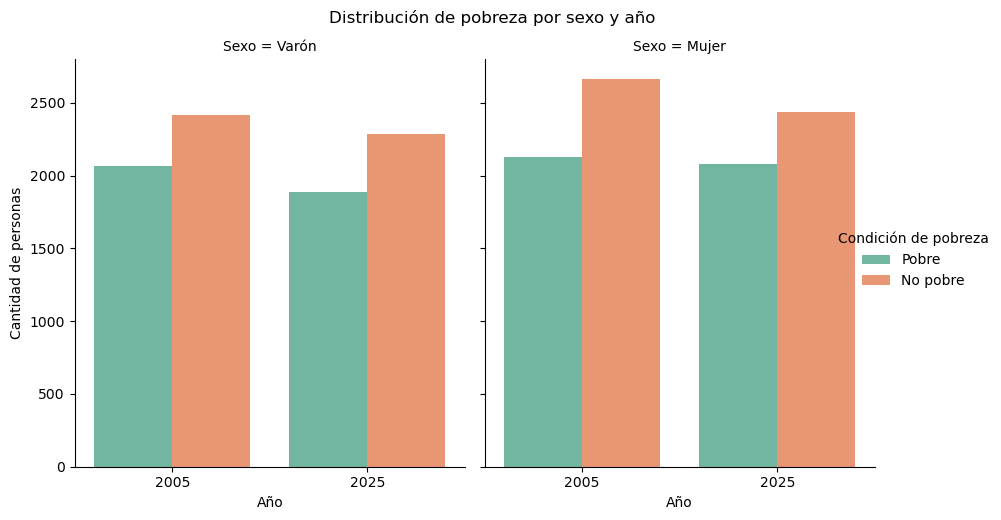

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar columnas necesarias
respondieron["pobre_label"] = respondieron["pobre"].map({0:"No pobre", 1:"Pobre"})
respondieron["sexo"] = respondieron["ch04"].map({1:"Varón", 2:"Mujer"})   # <- crear 'sexo'
respondieron["año"]  = respondieron["ano4"].astype(int).astype(str)       # opcional: rotulos limpios

# ¡Ojo! no uses plt.figure() con catplot: catplot crea su propia figura
g = sns.catplot(
    data=respondieron,
    x="año", hue="pobre_label", col="sexo",
    kind="count", palette="Set2", height=5, aspect=0.9
)

# Etiquetas lindas
g.set_axis_labels("Año", "Cantidad de personas")
g.set_titles("Sexo = {col_name}")
g._legend.set_title("Condición de pobreza")
g.fig.suptitle("Distribución de pobreza por sexo y año", y=1.03)
plt.show()

- Creamos la variable pobre_label para diferenciar pobres y no pobres con etiquetas claras
- Usamos sns.displot para graficar la distribución de la edad (ch06):
    - Hicimos histogramas apilados con colores distintos para pobres y no pobres
    - Usamos(col="ano4") para mostrar un panel por cada año (2005 y 2025)
    - Curvas de densidad superpuestas para visualizar mejor la forma de cada distribucion
    - Agregamos una línea punteada vertical en cada panel que marca la mediana de edad correspondiente

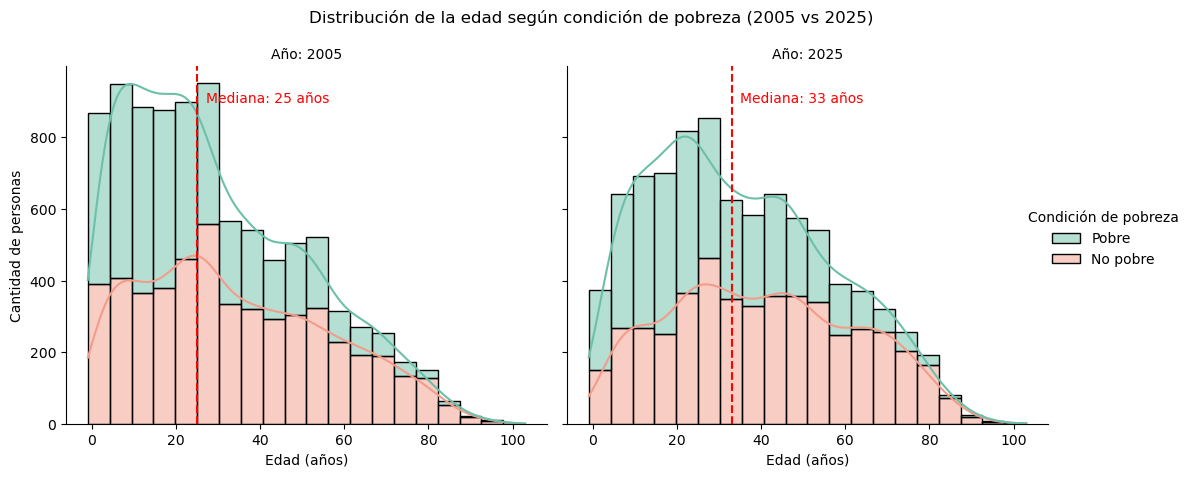

In [193]:
import seaborn as sns, matplotlib.pyplot as plt

# Ponemos los labels
respondieron["pobre_label"] = respondieron["pobre"].map({0:"No pobre",1:"Pobre"})
respondieron["ano4"] = respondieron["ano4"].astype(int)

df = respondieron[respondieron["ano4"].isin([2005,2025])]

# realizamos el grafico
g = sns.displot(
    data=df, x="ch06", hue="pobre_label", col="ano4",
    kind="hist", multiple="stack", bins=20,
    kde=True, palette={"Pobre":"#6CC0A9","No pobre":"#F39C8A"},
    height=4.5, aspect=1.2
)

# armamos una linea punteada que indique la mediana
for ax,(a,sub) in zip(g.axes.flat, df.groupby("ano4")):
    ax.axvline(sub["ch06"].median(), ls="--", c="red")

# titulos y lables
g.set_axis_labels("Edad (años)", "Cantidad de personas")
g.set_titles("Año: {col_name}")
g._legend.set_title("Condición de pobreza")

# texto para el grafico
for ax,(a,sub) in zip(g.axes.flat, df.groupby("ano4")):
    mediana = int(sub["ch06"].median())
    ax.text(mediana+2, ax.get_ylim()[1]*0.9,
            f"Mediana: {mediana} años", color="red")

g.fig.suptitle("Distribución de la edad según condición de pobreza (2005 vs 2025)", y=1.05)
plt.show()